# Team 4

#### Abdulaziz Alsulami
#### Razan Alsulieman
#### Smouh Alqahtani

#### Kaggle Notebook Link
https://www.kaggle.com/engabdulaziz/survivors-prediction

## Problem Statement

The sinking of the Titanic is one of the most infamous shipwrecks in history. During her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. 

Unfortunately, there weren’t enough lifeboats for everyone onboard, ending the lives of in excess of 1502 out of 2224 passengers and crew. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. 

We have used two data sets, one to create a model and the other to test it which is provided by Kaggle to create a prediction model. At last, our prediction is evaluated according to whether we effectively predicted the result for each passenger in the test file.

## Features Describtion

__Survived__: 0 = No, 1 = Yes

__Pclass__:  (Ticket class) 1 = 1st, 2 = 2nd, 3 = 3rd

__Sex__: Male, Femal

__Age__: Age in years

__SibSp__: number of siblings/spouses aboard the Titanic

__Parch__: number of parents/children aboard the Titanic

__Ticket__: Ticket number

__Fare__: Passenger fare

__Cabin__: Cabin number

__Embarked__: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

## Import Libraries

In [169]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

## Explore Data

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.shape

(891, 12)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see some features have observations less than entries 891

- Age 715 entries
- Cabin 204 entries

That means there are null values in these features

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Check number of unique values for each features to see if can plot them or not
for col in train_df.columns:
    unique_vals = train_df[col].nunique()
    print(f'{col}: {unique_vals} as unique values')
    print(f'Data type: {train_df[col].dtypes}')
    print('')

PassengerId: 891 as unique values
Data type: int64

Survived: 2 as unique values
Data type: int64

Pclass: 3 as unique values
Data type: int64

Name: 891 as unique values
Data type: object

Sex: 2 as unique values
Data type: object

Age: 88 as unique values
Data type: float64

SibSp: 7 as unique values
Data type: int64

Parch: 7 as unique values
Data type: int64

Ticket: 681 as unique values
Data type: object

Fare: 248 as unique values
Data type: float64

Cabin: 147 as unique values
Data type: object

Embarked: 3 as unique values
Data type: object



In [8]:
# check the value type is one type or different types
train_df['Ticket'].value_counts()[:10]

1601            7
CA. 2343        7
347082          7
CA 2144         6
3101295         6
347088          6
S.O.C. 14879    5
382652          5
LINE            4
17421           4
Name: Ticket, dtype: int64

There are different types of values such as numbers, letters and mix of them, so we can't plot this type of data

In [9]:
# check the value type is one type or different types
train_df['Cabin'].value_counts()[:10]

G6             4
C23 C25 C27    4
B96 B98        4
D              3
E101           3
F33            3
C22 C26        3
F2             3
C126           2
B51 B53 B55    2
Name: Cabin, dtype: int64

Similar to Tickit different types of values numbers, letters and mix of them.

**Analyze Explanatory Data**

The columns that will be ignored from EDA

- __PassengerId__ is like an id number will ignore it.
- __Name__ is do not give us any benefit will ignore it.
- __Tickit__ is do not give us any benefit will ignore it.
- __Cabin__ is do not give us any benefit will ignore it.

In [10]:
def subplots_features_count_dists(data):
    '''
    return to distribution of continuse features or count of discreate features
    ignore specific features they do not have any meaning 
    '''
    
    ignored_cols = ['PassengerId','Name', 'Ticket', 'Cabin']
    cols = [ col for col in data.columns if col not in ignored_cols]
    
    nrows= int(np.ceil(len(cols)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(12,8), constrained_layout=True)
    ax = ax.ravel()
    
    for i in range(len(cols)):

        if (data[cols[i]].dtypes == 'object') or (len(data[cols[i]].unique().tolist()) < 10):
            sns.countplot(y = data[cols[i]], ax=ax[i])
            ax[i].set_title(f'{cols[i]} count')
        
        else:
            sns.histplot(x = data[cols[i]], ax=ax[i])
            ax[i].set_title(f'{cols[i]} distribution')

    plt.show()

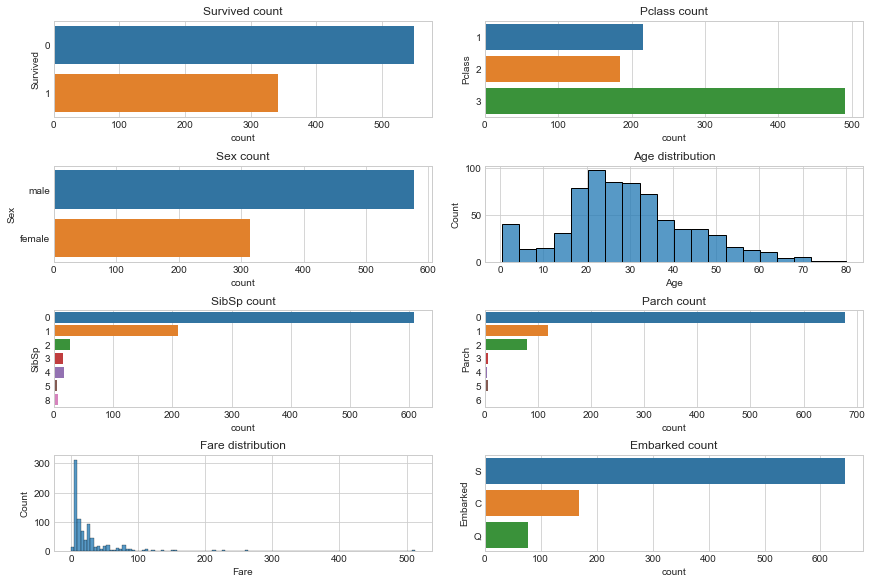

In [11]:
subplots_features_count_dists(train_df)

we can see count of categories and distibution of numerics variabels.

- __Survived variable__: number of dead persons were 60% while survivors persons were 40%
- __Pclass variabel__: 55% of values were in class 3 while 45% for class 1 and 2 
- __Sex variable__: 65% of persons in Titanic were male and 35% were femal
- __Age variable__: a little right skewness wherease the majority distribution were in the range from 20 to 38
- __SibSp variable__: 67% of persons did not have Siblings/spouses abroad Titanic wherease 22% had one person and 11% had different number of person abroad Titanic
- __Parch variable__: 75% of persons did not have Parent/children that means they unmmarried or thier parents were dead or with them on Titanic while 13% had one person abroad Titanic and 9% had two persons.
- __Fare varialbe__: a high right skewness wherease most fares were less than 100
- __Embarked variable__: 72% of persons embarked from Southampton, 20% from Cherbourg and 8% from Queenstown

**Check each feature with survived feature**

**Survived vs Pclass**

In [12]:
def subplots_two_cols(data, cols):
    """
    if number of uniques in col from cols less than 10 
    then create kdeplot otherwise create countplot
    """
    plt.figure(figsize=[8,5])
    
    if data[cols[1]].nunique() > 10:
        sns.kdeplot(x = cols[1], hue=cols[0], data=data)
        plt.title(f'{cols[1]} by Passengers')
    else:
        sns.countplot(x = cols[0], hue=cols[1], data=data)
        plt.title(f'Survivors count grouped by {cols[1]}')
        plt.legend(loc='upper right')
        plt.show()

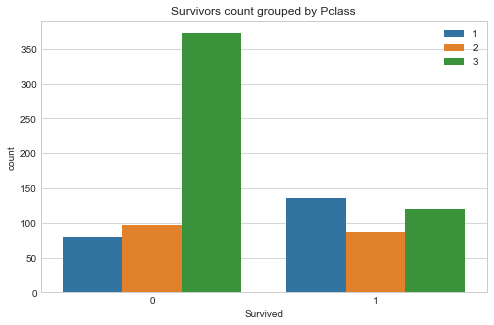

In [13]:
subplots_two_cols(train_df, ['Survived','Pclass'])

We can see that most persons in the low class '3' were unsurvivors while in the high class '3' the majority were survivors and in class '2' the percent was equally.

**Survived vs Sex**

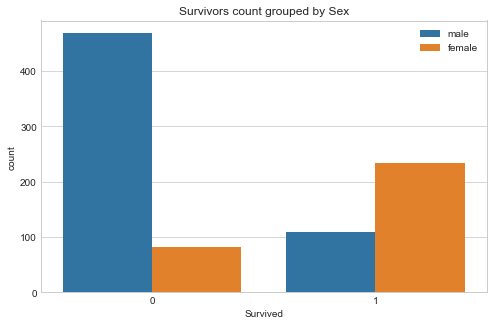

In [14]:
subplots_two_cols(train_df, ['Survived', 'Sex'])

Unfortuntly, most unsurvivors were male and who survivors were the majorty female

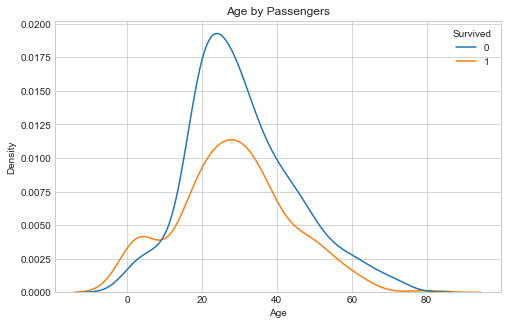

In [15]:
subplots_two_cols(train_df, ['Survived', 'Age'])

Almostly same with grouped by but the small spike in survivors near 0 may be return to childern and women first

**Survived vs SibSp**

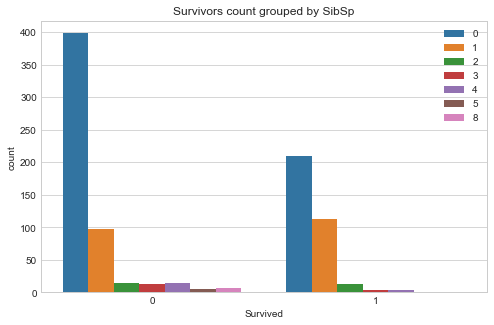

In [16]:
subplots_two_cols(train_df, ['Survived', 'SibSp'])

Most unsurvivors and survivors had not siblings/spouses abroad Titanic and a few percent had one siblings/spouses.

**Survived vs Parch**

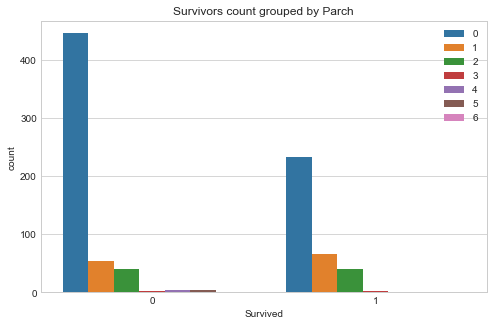

In [17]:
subplots_two_cols(train_df, ['Survived', 'Parch'])

Most unsurvivors and survivors had not parents/children abroad Titanic may been with them, were unmarried or dead while few percent had one or two parents/children.

**Survived vs Fare**

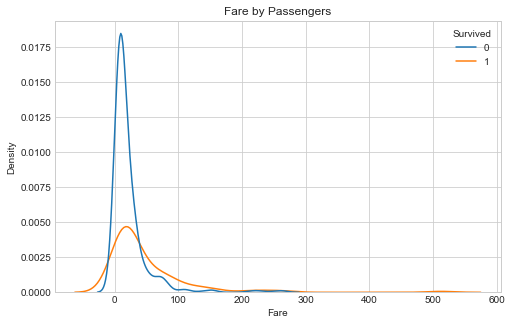

In [18]:
subplots_two_cols(train_df, ['Survived', 'Fare'])

This is matched with class categories, so most unsurvivors were in a low class with low fare a few of them were survivors while a high class had a high chance to be survival.

**Survived vs Embarked**

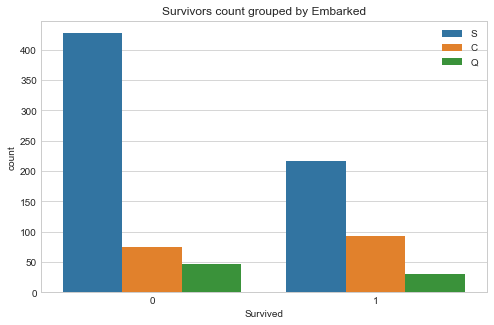

In [19]:
subplots_two_cols(train_df, ['Survived', 'Embarked'])

The majorty of unsurvivors and survivors embarked from Sou and few them embared from c and q

## Clean Data

In [20]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Passinger Id**

In [22]:
# we will drop it because it isn't add any meaning 
train_df = train_df.drop('PassengerId', axis=1)
test_df = test_df.drop('PassengerId', axis=1)

**Age**

In [23]:
age_mean = int(train_df['Age'].mean())
age_mean

29

In [24]:
train_df['Age'] = train_df['Age'].fillna(age_mean)

In [25]:
train_df['Age'].isna().sum()

0

In [26]:
age_mean = int(test_df['Age'].mean())
age_mean

30

In [27]:
test_df['Age'] = test_df['Age'].fillna(age_mean)

In [28]:
test_df['Age'].isna().sum()

0

**Fare**

In [29]:
fare_med = test_df['Fare'].median()
fare_med

14.4542

In [30]:
test_df['Fare'] = test_df['Fare'].fillna(fare_med)

In [31]:
test_df['Fare'].isna().sum()

0

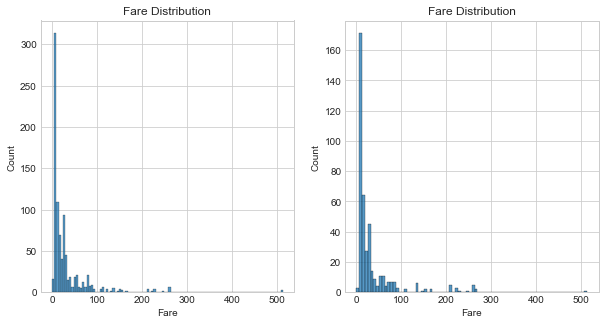

In [32]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

sns.histplot(train_df['Fare'], ax=ax[0]).set_title('Fare Distribution')
sns.histplot(test_df['Fare'], ax=ax[1]).set_title('Fare Distribution');

We will should reduce the variation and skewness to be normal or seminormal distribution

In [33]:
# drop zero fares and then apply log transformation
train_df = train_df[train_df['Fare'] != 0]
train_df['Fare'] = np.log(train_df['Fare'])
test_df = test_df[test_df['Fare'] != 0]
test_df['Fare'] = np.log(test_df['Fare'])

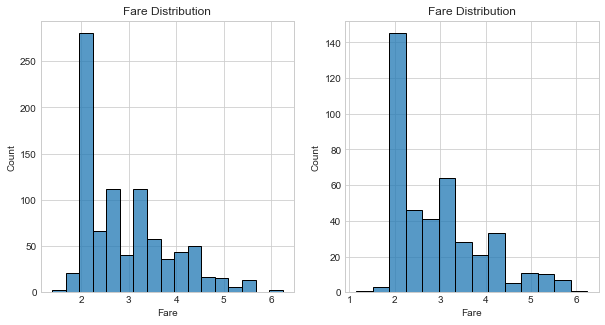

In [34]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

sns.histplot(train_df['Fare'], ax=ax[0]).set_title('Fare Distribution')
sns.histplot(test_df['Fare'], ax=ax[1]).set_title('Fare Distribution');

I Think now prettey good than first

**Cabin**

In [35]:
# We will drop it from data because we have lots of missing values
train_df = train_df.drop(labels='Cabin', axis=1)
test_df = test_df.drop(labels='Cabin', axis=1)

**Embarked**

In [36]:
# We will fill it with the most value
stats.mode(train_df['Embarked'])
train_df['Embarked'] = train_df['Embarked'].fillna('S')
train_df['Embarked'].isna().sum()

0

**Tickit**

In [37]:
# We will split each value by scpace then 
# check if it is numeric don't change it else 
# take the the first of number of the lst elemnt

train_df['Ticket'] = train_df['Ticket'].apply(lambda x: x.split()[0][0] if x.isnumeric() else x.split(' ')[-1][0])
train_df['Ticket'].value_counts()

3    367
1    226
2    224
7     15
4     15
6     14
5      9
8      3
9      3
Name: Ticket, dtype: int64

In [38]:
train_df['Ticket'] = train_df['Ticket'].astype('int')

In [39]:
test_df['Ticket'] = test_df['Ticket'].apply(lambda x: x.split()[0][0] if x.isnumeric() else x.split(' ')[-1][0])
test_df['Ticket'] = test_df['Ticket'].astype('int')

**Name**

In [40]:
# drop name because it isn't add any meaning
train_df = train_df.drop('Name', axis=1)
test_df = test_df.drop('Name', axis=1)

In [41]:
train_df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,2,1.981001,S
1,1,1,female,38.0,1,0,1,4.266662,C


In [42]:
test_df.head(2)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,male,34.5,0,0,3,2.05786,Q
1,3,female,47.0,1,0,3,1.94591,S


In [43]:
# decod specific features from category to binary for modling
train_df = pd.get_dummies(train_df, columns=['Pclass', 'Sex', 'Embarked'])
test_df = pd.get_dummies(test_df, columns=['Pclass', 'Sex', 'Embarked'])

<AxesSubplot:>

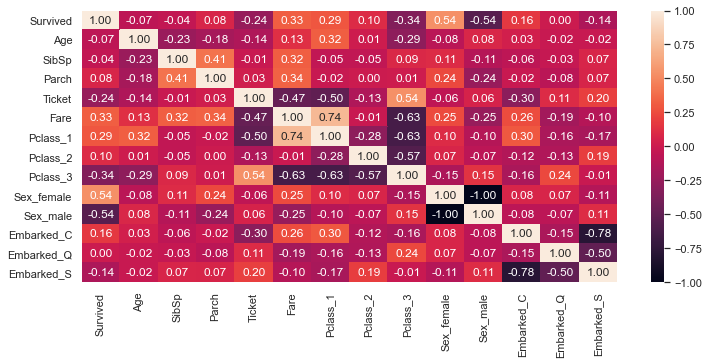

In [44]:
# check for correlation is there any correlation between features
plt.figure(figsize=(12,5))

sns.set(font_scale=1)

sns.heatmap(
    data=train_df.corr(),
    annot=True,
    fmt = '0.2f',
);

There some high correlation:
- Sex_female and Sex_male 
- Embarked_C and Embarked_S

In [45]:
# We will drop highly correlated features Sex_male, Embarked_C
train_df = train_df.drop(labels=['Sex_female', 'Embarked_C'], axis=1)
test_df = test_df.drop(labels=['Sex_female', 'Embarked_C'], axis=1)

## Create Models

**Seperate to X_train, X_test, y_train, y_test**

In [46]:
X_train_df = train_df.drop('Survived', axis=1)
y_train_df = train_df['Survived'].values
X_test_df = test_df
y_test_df = y_train_df[:416]

**Scale X_train and X_test**

In [47]:
sc = StandardScaler()
X_train_df_sc = sc.fit_transform(X_train_df)
X_test_df_sc = sc.transform(X_test_df)

**Baseline score**

In [48]:
# The baseline score 
train_df['Survived'].value_counts(normalize=True)

0    0.610731
1    0.389269
Name: Survived, dtype: float64

In [49]:
# Function that runs the requested algorithm and returns the accuracy score
def fit_model_algo(algo, X_train, y_train, X_tet, y_test, cv):
    
    # Cross Validation 
    acc_cv = cross_val_score(
                                    algo, 
                                    X_train, 
                                    y_train, 
                                    cv=cv, 
                                    n_jobs = -1)
    
    # Cross-validation mean accuracy score
    acc_cv = np.mean(acc_cv)
    
    # Test prediction and accuracy score
    algo.fit(X_train, y_train)
    test_score = algo.score(X_test_df_sc, y_test)
    test_pred = algo.predict(X_test_df_sc)
    return test_pred, acc_cv, test_score

In [50]:
# creat dataframe with two columns the frist columns with model name 
# the second model with score after model is optimised by grid search

model_score_lst = pd.DataFrame(
    {
        'Model':[
            'Logistic Regression', 
            'KNN Classifier',
            'Decision Tree Classifier', 
            'Random Forest Classifier',
            'Bagging Classifier',
            'Extra tree Classifier'], 
        'Grid Search Score': None,
    }, 
         index = np.arange(6)
)
model_score_lst

,Model,Grid Search Score
0,Logistic Regression,None
1,KNN Classifier,None
2,Decision Tree Classifier,None
3,Random Forest Classifier,None
4,Bagging Classifier,None
5,Extra tree Classifier,None


**Logistic Regression**

In [51]:
lr = LogisticRegression()
test_pred_lr, acc_cv, test_score =  fit_model_algo(lr, X_train_df_sc, y_train_df, X_test_df_sc, y_test_df, 10)
print(f'CV Average Score: {acc_cv}')
print(f'Test Scroe: {test_score}')

CV Average Score: 0.7888714733542319
Test Scroe: 0.5120192307692307


**KNN Classifier**

In [52]:
knn = KNeighborsClassifier(n_neighbors=10)
test_pred_knn, acc_cv, test_score =  fit_model_algo(knn, X_train_df_sc, y_train_df, X_test_df_sc, y_test_df, 10)
print(f'CV Average Score: {acc_cv}')
print(f'Test Scroe: {test_score}')

CV Average Score: 0.8047805642633229
Test Scroe: 0.5384615384615384


**Decision Tree Classifier**

In [53]:
dt = DecisionTreeClassifier()
test_pred_dt, acc_cv, test_score =  fit_model_algo(dt, X_train_df_sc, y_train_df, X_test_df_sc, y_test_df, 10)
print(f'CV Average Score: {acc_cv}')
print(f'Test Scroe: {test_score}')

CV Average Score: 0.7763061650992686
Test Scroe: 0.5288461538461539


**Random Forest Classifier**

In [54]:
rf = RandomForestClassifier()
test_pred_rf, acc_cv, test_score =  fit_model_algo(rf, X_train_df_sc, y_train_df, X_test_df_sc, y_test_df, 10)
print(f'CV Average Score: {acc_cv}')
print(f'Test Scroe: {test_score}')

CV Average Score: 0.8150731452455592
Test Scroe: 0.5552884615384616


**Bagging Classifier**

In [55]:
be = BaggingClassifier()
test_pred_rf, acc_cv, test_score =  fit_model_algo(be, X_train_df_sc, y_train_df, X_test_df_sc, y_test_df, 10)
print(f'CV Average Score: {acc_cv}')
print(f'Test Scroe: {test_score}')

CV Average Score: 0.8002612330198537
Test Scroe: 0.5504807692307693


**Extra Tree Classifier**

In [56]:
et = ExtraTreesClassifier()
test_pred_rf, acc_cv, test_score =  fit_model_algo(et, X_train_df_sc, y_train_df, X_test_df_sc, y_test_df, 10)
print(f'CV Average Score: {acc_cv}')
print(f'Test Scroe: {test_score}')

CV Average Score: 0.7922675026123301
Test Scroe: 0.5528846153846154


## Optimize models

**Logistic Regression**

In [57]:
param_grid = {
     'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : [3, 5, 7, 9, 11, 20, 50, 100],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [58]:
gs = GridSearchCV(lr, 
                  param_grid, 
                  cv=5,
                  scoring='roc_auc',
                  verbose=1)


In [59]:
gs.fit(X_train_df_sc, y_train_df)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    2.7s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [3, 5, 7, 9, 11, 20, 50, 100],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='roc_auc', verbose=1)

In [60]:
gs.best_estimator_

LogisticRegression(C=3, penalty='l1', solver='saga')

In [61]:
gs.best_score_

0.8509409533825721

In [62]:
# Model accuracy score from unseen data
gs_score = gs.score(X_test_df_sc, y_test_df)
gs_score

0.4794036162146398

In [63]:
# append model score after the optiming 
model_score_lst['Grid Search Score'][0] = gs_score
model_score_lst

,Model,Grid Search Score
0,Logistic Regression,0.479404
1,KNN Classifier,None
2,Decision Tree Classifier,None
3,Random Forest Classifier,None
4,Bagging Classifier,None
5,Extra tree Classifier,None


**KNN**

In [64]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 20, 50, 100],
    'weights': ['uniform', 'distance'],
    'metric': ['manhattan', 'euclidean']
}

In [65]:
gs = GridSearchCV(knn, 
                  param_grid, 
                  cv=5,
                  scoring='accuracy',
                  verbose=1)
gs.fit(X_train_df_sc, y_train_df)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    1.4s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=10),
             param_grid={'metric': ['manhattan', 'euclidean'],
                         'n_neighbors': [3, 5, 7, 9, 11, 20, 50, 100],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [66]:
gs.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [67]:
gs.best_score_

0.8105194805194806

In [68]:
gs_score = gs.score(X_test_df_sc, y_test_df)
gs_score

0.5144230769230769

In [69]:
# append model score after the optemising 
model_score_lst['Grid Search Score'][1] = gs_score
model_score_lst

,Model,Grid Search Score
0,Logistic Regression,0.479404
1,KNN Classifier,0.514423
2,Decision Tree Classifier,None
3,Random Forest Classifier,None
4,Bagging Classifier,None
5,Extra tree Classifier,None


**Decision Tree**

In [70]:
param_grid= {
    'criterion': ["gini", "entropy"],
    'splitter': ["best", "random"],
    'max_depth': [10, 100, 1000],
    'max_features' : list(range(6,32,5))
}

In [71]:
gs = GridSearchCV(dt, 
                  param_grid, 
                  cv=5,
                  scoring='accuracy',
                  verbose=1)
gs.fit(X_train_df_sc, y_train_df)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    0.6s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 100, 1000],
                         'max_features': [6, 11, 16, 21, 26, 31],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [72]:
gs.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=11,
                       splitter='random')

In [73]:
gs.best_score_

0.8059545454545454

In [74]:
# Model accuracy score from unseen data
gs_score = gs.score(X_test_df_sc, y_test_df)
gs_score

0.5264423076923077

In [75]:
# append model score after the optemizing
model_score_lst['Grid Search Score'][2] = gs_score
model_score_lst

,Model,Grid Search Score
0,Logistic Regression,0.479404
1,KNN Classifier,0.514423
2,Decision Tree Classifier,0.526442
3,Random Forest Classifier,None
4,Bagging Classifier,None
5,Extra tree Classifier,None


**Random Forest**

In [76]:
param_grid = {
    'n_estimators' : list(range(10,101,10)),
    'max_features' : list(range(6,32,5))
             }

In [77]:
gs = GridSearchCV(rf, 
                  param_grid, 
                  cv=5,
                  scoring='accuracy',
                  verbose=1)
gs.fit(X_train_df_sc, y_train_df)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   17.6s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': [6, 11, 16, 21, 26, 31],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             scoring='accuracy', verbose=1)

In [78]:
gs.best_estimator_

RandomForestClassifier(max_features=6, n_estimators=50)

In [79]:
gs.best_score_

0.8185194805194804

In [80]:
# Model accuracy score from unseen data
gs_score = gs.score(X_test_df_sc, y_test_df)
gs_score

0.5432692307692307

In [81]:
# append model score after the optiming 
model_score_lst['Grid Search Score'][3] = gs_score
model_score_lst

,Model,Grid Search Score
0,Logistic Regression,0.479404
1,KNN Classifier,0.514423
2,Decision Tree Classifier,0.526442
3,Random Forest Classifier,0.543269
4,Bagging Classifier,None
5,Extra tree Classifier,None


**Bagging Classifier**

In [82]:
param_grid = {
    'n_estimators' : list(range(10,101,10)),
    'max_features' : list(range(6,32,5))
             }

In [83]:
gs = GridSearchCV(be, 
                  param_grid, 
                  cv=5,
                  scoring='accuracy',
                  verbose=1)
gs.fit(X_train_df_sc, y_train_df)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   14.6s finished


GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'max_features': [6, 11, 16, 21, 26, 31],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             scoring='accuracy', verbose=1)

In [84]:
gs.best_estimator_

BaggingClassifier(max_features=6, n_estimators=100)

In [85]:
gs.best_score_

0.8208636363636364

In [86]:
# Model accuracy score from unseen data
gs_score = gs.score(X_test_df_sc, y_test_df)
gs_score

0.53125

In [87]:
# append model score after the optiming 
model_score_lst['Grid Search Score'][4] = gs_score
model_score_lst

,Model,Grid Search Score
0,Logistic Regression,0.479404
1,KNN Classifier,0.514423
2,Decision Tree Classifier,0.526442
3,Random Forest Classifier,0.543269
4,Bagging Classifier,0.53125
5,Extra tree Classifier,None


**Extra Tree Classifier**

In [88]:
param_grid = {
    'criterion' : ["gini", "entropy"],
    'n_estimators' : list(range(10,101,10)),
    'max_features' : list(range(6,32,5))
             }

In [89]:
gs = GridSearchCV(et, 
                  param_grid, 
                  cv=5,
                  scoring='accuracy',
                  verbose=1)
gs.fit(X_train_df_sc, y_train_df)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   31.7s finished


GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [6, 11, 16, 21, 26, 31],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             scoring='accuracy', verbose=1)

In [90]:
gs.best_estimator_

ExtraTreesClassifier(criterion='entropy', max_features=6, n_estimators=50)

In [91]:
gs.best_score_

0.8082597402597402

In [92]:
# Model accuracy score from unseen data
gs_score = gs.score(X_test_df_sc, y_test_df)
gs_score

0.5504807692307693

In [93]:
# append model score after the optiming 
model_score_lst['Grid Search Score'][5] = gs_score
model_score_lst

,Model,Grid Search Score
0,Logistic Regression,0.479404
1,KNN Classifier,0.514423
2,Decision Tree Classifier,0.526442
3,Random Forest Classifier,0.543269
4,Bagging Classifier,0.53125
5,Extra tree Classifier,0.550481


## Select the best model and show metrics

Finally, we will select the best score after optimizing the model and submission the prediction of that model.
We can see the __Extra Tree Classifier__ has the highest score so, we will save the prediction of model and submit it.

In [94]:
test_pred_gs_et = gs.predict(X_test_df_sc)

In [154]:
def features_important(df, model):
    
    feat_imp = pd.DataFrame({
                 'Featrues Name': df.columns.tolist(),
                 'Important Rate': model.feature_importances_.tolist()
    })
    
    feat_imp = feat_imp.sort_values(by='Important Rate', ascending=False)
    
    plt.figure(figsize=(12,6))
    _ = sns.barplot(y = feat_imp['Featrues Name'], x = feat_imp['Important Rate'], data=feat_imp, orient='h')
    plt.title('Feature Important')
    
    return feat_imp

,Featrues Name,Important Rate
8,Sex_male,0.279507
0,Age,0.229774
4,Fare,0.203788
7,Pclass_3,0.066004
3,Ticket,0.052335
2,Parch,0.042902
1,SibSp,0.042838
5,Pclass_1,0.038104
10,Embarked_S,0.021403
6,Pclass_2,0.015944


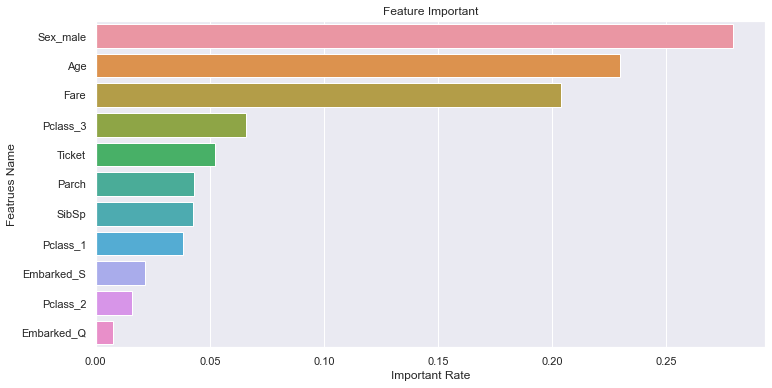

In [157]:
features_important(test_df, et)

**Metrics**

In [168]:
target_names = ['Unsurvivors{class 0}', 'Survivors{class 1}']

print(f'Confusion Matrix:\n{confusion_matrix(y_test_df, test_pred_gs_et)}\n')
print(f"Classification Report:\n{classification_report(y_test_df, test_pred_gs_et, target_names=target_names)}")

Confusion Matrix:
[[167  87]
 [100  62]]

Classification Report:
                      precision    recall  f1-score   support

Unsurvivors{class 0}       0.63      0.66      0.64       254
  Survivors{class 1}       0.42      0.38      0.40       162

            accuracy                           0.55       416
           macro avg       0.52      0.52      0.52       416
        weighted avg       0.54      0.55      0.55       416



**Sbumission file**

In [109]:
submission_file = pd.read_csv('gender_submission.csv')

In [110]:
submission_file.index = submission_file['PassengerId']
submission_file.drop(labels=['PassengerId','Survived'], axis=1, inplace=True)

In [112]:
pred_lst = test_pred_gs_et.tolist()
pred_lst.append(0)
pred_lst.append(0)
y_test_df = np.array(pred_lst)
y_test_df.shape

(418,)

In [113]:
submission_file['Survived'] = y_test_df

In [114]:
submission_file.to_csv('test_pred_gs_et.csv')